Datei erfolgreich eingelesen!

FEHLERSUCHE BERICHT:
--------------------------------------------------

1. Fehlende Werte:
Datum          0
Warengruppe    0
Umsatz         0
dtype: int64

2. Datentypen:
Datum           object
Warengruppe      int64
Umsatz         float64
dtype: object

3. Anzahl negativer Umsätze: 0

4. Anzahl Duplikate: 0

5. Datumsformat: OK

6. Statistischer Überblick der Umsätze:
count    9334.000000
mean      206.749044
std       144.545189
min         7.051201
25%        96.897441
50%       161.900831
75%       280.644663
max      1879.461831
Name: Umsatz, dtype: float64


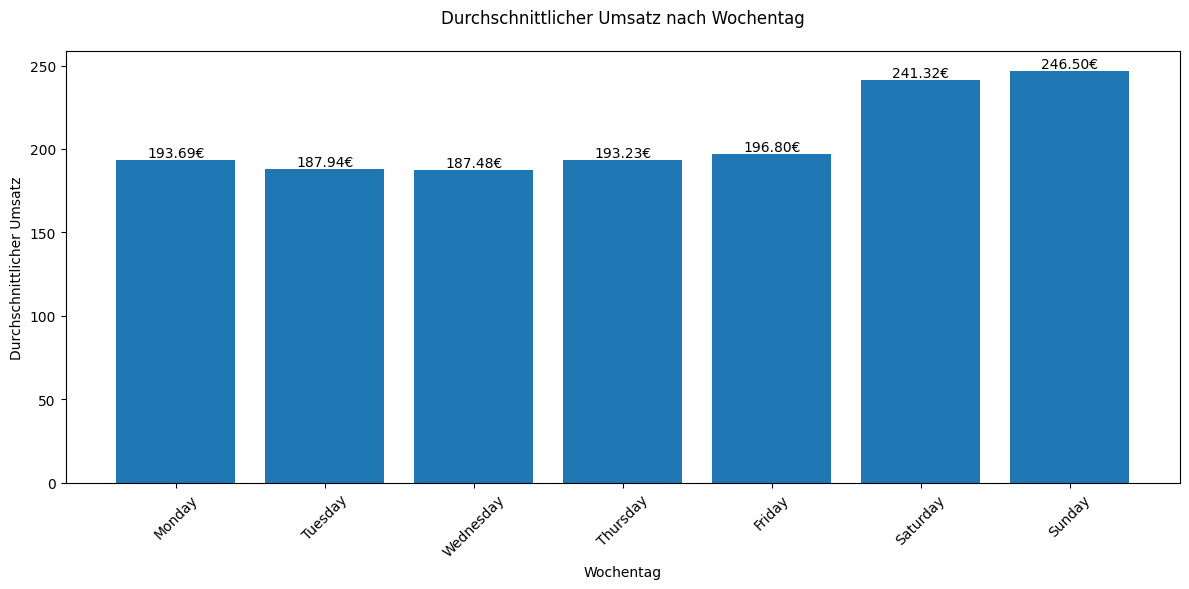

Datei erfolgreich eingelesen!

FEHLERSUCHE BERICHT:
--------------------------------------------------

1. Fehlende Werte:
Datum          0
Warengruppe    0
Umsatz         0
dtype: int64

2. Datentypen:
Datum           object
Warengruppe      int64
Umsatz         float64
dtype: object

3. Anzahl negativer Umsätze: 0

4. Anzahl Duplikate: 0

5. Datumsformat: OK

6. Statistischer Überblick der Umsätze:
count    9334.000000
mean      206.749044
std       144.545189
min         7.051201
25%        96.897441
50%       161.900831
75%       280.644663
max      1879.461831
Name: Umsatz, dtype: float64


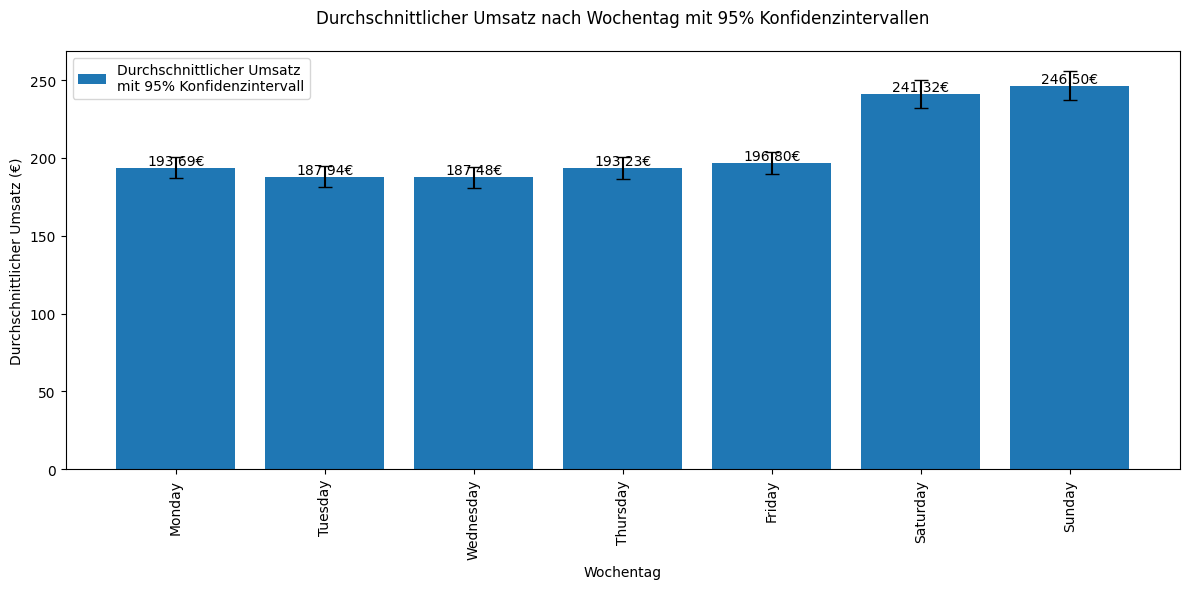


Detaillierte Statistiken je Wochentag:
--------------------------------------------------

Monday:
Mittelwert: 193.69€
95% Konfidenzintervall: [186.82€, 200.56€]

Tuesday:
Mittelwert: 187.94€
95% Konfidenzintervall: [181.18€, 194.71€]

Wednesday:
Mittelwert: 187.48€
95% Konfidenzintervall: [180.56€, 194.39€]

Thursday:
Mittelwert: 193.23€
95% Konfidenzintervall: [186.16€, 200.30€]

Friday:
Mittelwert: 196.80€
95% Konfidenzintervall: [189.89€, 203.70€]

Saturday:
Mittelwert: 241.32€
95% Konfidenzintervall: [232.36€, 250.28€]

Sunday:
Mittelwert: 246.50€
95% Konfidenzintervall: [236.93€, 256.06€]


,Datum,Warengruppe,Umsatz,Wochentag
0,2013-07-01,1,148.828353,Monday
1,2013-07-02,1,159.793757,Tuesday
2,2013-07-03,1,111.885594,Wednesday
3,2013-07-04,1,168.864941,Thursday
4,2013-07-05,1,171.280754,Friday


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 1. Daten einlesen
try:
    df = pd.read_csv('umsatzdaten_gekuerzt.csv')
    print("Datei erfolgreich eingelesen!")
except FileNotFoundError:
    print("Fehler: Die Datei wurde nicht gefunden!")
    exit()

# 2. Fehlersuche und Bericht
def check_data(df):
    print("\nFEHLERSUCHE BERICHT:")
    print("-" * 50)
    
    # Überprüfung auf fehlende Werte
    missing_values = df.isnull().sum()
    print("\n1. Fehlende Werte:")
    print(missing_values)
    
    # Überprüfung der Datentypen
    print("\n2. Datentypen:")
    print(df.dtypes)
    
    # Überprüfung auf negative Umsätze
    negative_umsatz = df[df['Umsatz'] < 0]
    print(f"\n3. Anzahl negativer Umsätze: {len(negative_umsatz)}")
    
    # Überprüfung auf Duplikate
    duplicates = df[df.duplicated()]
    print(f"\n4. Anzahl Duplikate: {len(duplicates)}")
    
    # Überprüfung der Datumswerte
    try:
        df['Datum'] = pd.to_datetime(df['Datum'])
        print("\n5. Datumsformat: OK")
    except:
        print("\n5. Fehler im Datumsformat!")
    
    # Überprüfung der Werteverteilung
    print("\n6. Statistischer Überblick der Umsätze:")
    print(df['Umsatz'].describe())

# 3. Datenbereinigung und Vorbereitung
def prepare_data(df):
    # Konvertiere Datum zu datetime
    df['Datum'] = pd.to_datetime(df['Datum'])
    
    # Füge Wochentag hinzu
    df['Wochentag'] = df['Datum'].dt.day_name()
    
    return df

# 4. Visualisierung
def plot_weekly_sales(df):
    # Definiere die Reihenfolge der Wochentage
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                     'Friday', 'Saturday', 'Sunday']
    
    # Berechne durchschnittliche Umsätze je Wochentag
    weekly_sales = df.groupby('Wochentag')['Umsatz'].mean().reindex(weekday_order)
    
    # Erstelle das Balkendiagramm
    plt.figure(figsize=(12, 6))
    bars = plt.bar(weekly_sales.index, weekly_sales.values)
    
    # Formatierung
    plt.title('Durchschnittlicher Umsatz nach Wochentag', pad=20)
    plt.xlabel('Wochentag')
    plt.ylabel('Durchschnittlicher Umsatz')
    plt.xticks(rotation=45)
    
    # Füge Werte über den Balken hinzu
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}€',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Hauptprogramm
if __name__ == "__main__":
    # Führe Fehlersuche durch
    check_data(df)
    
    # Bereite Daten vor
    df = prepare_data(df)
    
    # Erstelle Visualisierung
    plot_weekly_sales(df)

#Aufgabe 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
from scipy import stats

# 1. Daten einlesen
try:
    df = pd.read_csv('umsatzdaten_gekuerzt.csv')
    print("Datei erfolgreich eingelesen!")
except FileNotFoundError:
    print("Fehler: Die Datei wurde nicht gefunden!")
    exit()

# 2. Fehlersuche und Bericht
def check_data(df):
    print("\nFEHLERSUCHE BERICHT:")
    print("-" * 50)
    
    # Überprüfung auf fehlende Werte
    missing_values = df.isnull().sum()
    print("\n1. Fehlende Werte:")
    print(missing_values)
    
    # Überprüfung der Datentypen
    print("\n2. Datentypen:")
    print(df.dtypes)
    
    # Überprüfung auf negative Umsätze
    negative_umsatz = df[df['Umsatz'] < 0]
    print(f"\n3. Anzahl negativer Umsätze: {len(negative_umsatz)}")
    
    # Überprüfung auf Duplikate
    duplicates = df[df.duplicated()]
    print(f"\n4. Anzahl Duplikate: {len(duplicates)}")
    
    # Überprüfung der Datumswerte
    try:
        df['Datum'] = pd.to_datetime(df['Datum'])
        print("\n5. Datumsformat: OK")
    except:
        print("\n5. Fehler im Datumsformat!")
    
    # Überprüfung der Werteverteilung
    print("\n6. Statistischer Überblick der Umsätze:")
    print(df['Umsatz'].describe())

# 3. Datenbereinigung und Vorbereitung
def prepare_data(df):
    # Konvertiere Datum zu datetime
    df['Datum'] = pd.to_datetime(df['Datum'])
    
    # Füge Wochentag hinzu
    df['Wochentag'] = df['Datum'].dt.day_name()
    
    return df

# 4. Berechnung der Konfidenzintervalle
def calculate_confidence_intervals(data, confidence=0.95):
    mean = np.mean(data)
    std_err = stats.sem(data)
    ci = stats.t.interval(confidence, len(data)-1, loc=mean, scale=std_err)
    return mean, ci[0], ci[1]

# 5. Visualisierung mit Konfidenzintervallen
def plot_weekly_sales_with_ci(df):
    # Definiere die Reihenfolge der Wochentage
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                     'Friday', 'Saturday', 'Sunday']
    
    # Berechne Statistiken für jeden Wochentag
    stats_data = []
    for day in weekday_order:
        day_data = df[df['Wochentag'] == day]['Umsatz']
        mean, ci_lower, ci_upper = calculate_confidence_intervals(day_data)
        stats_data.append({
            'Wochentag': day,
            'Mittelwert': mean,
            'CI_lower': ci_lower,
            'CI_upper': ci_upper
        })
    
    stats_df = pd.DataFrame(stats_data)
    
    # Erstelle das Balkendiagramm
    plt.figure(figsize=(12, 6))
    
    # Plotte Balken
    bars = plt.bar(stats_df['Wochentag'], stats_df['Mittelwert'], 
                  yerr=[(stats_df['Mittelwert'] - stats_df['CI_lower']), 
                        (stats_df['CI_upper'] - stats_df['Mittelwert'])],
                  capsize=5, alpha=1)
    
    # Formatierung
    plt.title('Durchschnittlicher Umsatz nach Wochentag mit 95% Konfidenzintervallen', pad=20)
    plt.xlabel('Wochentag')
    plt.ylabel('Durchschnittlicher Umsatz (€)')
    plt.xticks(rotation=90)
    
    # Füge Werte über den Balken hinzu
    for idx, bar in enumerate(bars):
        height = stats_df.iloc[idx]['Mittelwert']
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}€',
                ha='center', va='bottom')
    
    # Füge Legende hinzu
    plt.legend(['Durchschnittlicher Umsatz\nmit 95% Konfidenzintervall'])
    
    plt.tight_layout()
    plt.show()
    
    # Drucke detaillierte Statistiken
    print("\nDetaillierte Statistiken je Wochentag:")
    print("-" * 50)
    for _, row in stats_df.iterrows():
        print(f"\n{row['Wochentag']}:")
        print(f"Mittelwert: {row['Mittelwert']:.2f}€")
        print(f"95% Konfidenzintervall: [{row['CI_lower']:.2f}€, {row['CI_upper']:.2f}€]")

# Hauptprogramm
if __name__ == "__main__":
    # Führe Fehlersuche durch
    check_data(df)
    
    # Bereite Daten vor
    df = prepare_data(df)
    
    # Erstelle Visualisierung mit Konfidenzintervallen
    plot_weekly_sales_with_ci(df)
    
df.head()

